**L078_GMM.ipynb**

2024 JUN 11

Tershire

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# data

In [2]:
from sklearn.datasets import load_iris

In [3]:
iris_dataset = load_iris()

columns = ["sepal_length", "sepal_width", "petal_length", "petal_width"]
iris_df = pd.DataFrame(iris_dataset.data, columns=columns)
iris_df["target"] = iris_dataset.target

In [4]:
display(iris_df.head(3))

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


# model

In [5]:
from sklearn.mixture import GaussianMixture

In [6]:
gmm = GaussianMixture(n_components=3, random_state=0)

# training

In [7]:
gmm_cluster_ids = gmm.fit_predict(iris_dataset.data)

In [8]:
iris_df["gmm_cluster_id"] = gmm_cluster_ids

In [9]:
clustering_result = iris_df.groupby(["target"])["gmm_cluster_id"].value_counts()
print(clustering_result)

target  gmm_cluster_id
0       1                 50
1       0                 45
        2                  5
2       2                 50
Name: count, dtype: int64


# model: K-means

In [10]:
from sklearn.cluster import KMeans

In [11]:
kmeans = KMeans(n_clusters=3, init="k-means++", max_iter=300, random_state=0)

# training: K-means

In [12]:
kmeans_cluster_ids = kmeans.fit_predict(iris_dataset.data)

In [13]:
iris_df["kmeans_cluster_id"] = kmeans_cluster_ids

In [14]:
clustering_result = iris_df.groupby(["target"])["kmeans_cluster_id"].value_counts()
print(clustering_result)

target  kmeans_cluster_id
0       1                    50
1       0                    47
        2                     3
2       2                    36
        0                    14
Name: count, dtype: int64


# ex. {GMM, K-means} comparison 

## data: baguette

In [15]:
from sklearn.datasets import make_blobs

In [16]:
X, Y = make_blobs(n_samples=300, n_features=2, centers=3, cluster_std=0.5, random_state=0)

transformation = [[0.60834549, -0.63667341], 
                  [-0.40887718, 0.85253229]]
X = np.dot(X, transformation)

dataset_df = pd.DataFrame(data=X, columns=["feature1", "feature2"])
dataset_df["target"] = Y

### visualization

In [40]:
def visualize_clustering(clusterer, dataframe, label_name, draw_centers=True):
    if draw_centers:
        centers = clusterer.cluster_centers_

    unique_labels = np.unique(dataframe[label_name].values)
    markers = ['o', 's', '^', 'x', '*']
    is_noise = False
    
    for label in unique_labels:
        cluster = dataframe[dataframe[label_name]==label]
        if label == -1:
            is_noise = True
            cluster_legend = "noise"
        else:
            cluster_legend = "cluster " + str(label)
        
        plt.scatter(x=cluster["feature1"], y=cluster["feature2"], s=70,
                    edgecolors='k', marker=markers[label], label=cluster_legend)

    if draw_centers:
        for i, center in enumerate(centers):
            # shape
            plt.scatter(x=center[0], y=center[1],
                        s=200, color="white", alpha=0.75,
                        edgecolors='k', marker=markers[i])
            # text
            plt.scatter(x=center[0], y=center[1],
                        s=70, color='k',
                        edgecolors='k', marker="$%d$" % i)

    if is_noise:
        legend_location = "upper center"
    else:
        legend_location = "upper right"

    plt.legend(loc=legend_location)
    plt.show()

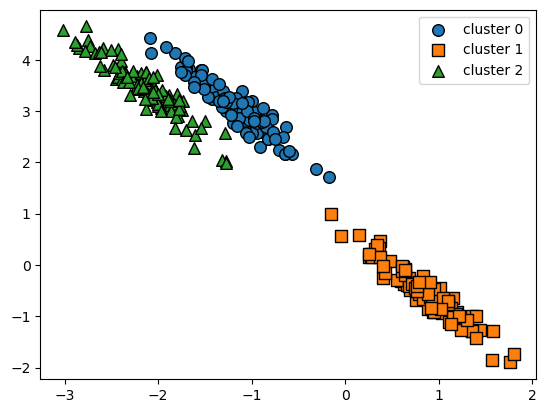

In [18]:
visualize_clustering(None, dataset_df, "target", False)

## model: K-means

In [19]:
from sklearn.cluster import KMeans

In [28]:
kmeans = KMeans(n_clusters=3, init="k-means++", max_iter=300, random_state=0)

## training

In [26]:
kmeans_cluster_ids = kmeans.fit_predict(X)

dataset_df["kmeans_cluster_id"] = kmeans_cluster_ids

## training result

In [38]:
clustering_result = dataset_df.groupby(["target"])["kmeans_cluster_id"].value_counts()
print(clustering_result)

target  kmeans_cluster_id
0       2                     73
        0                     27
1       1                    100
2       0                     86
        2                     14
Name: count, dtype: int64


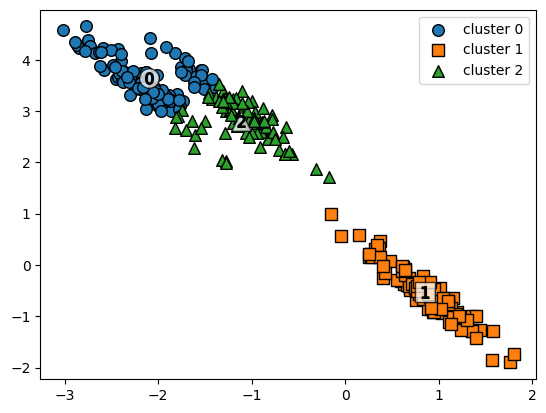

In [27]:
visualize_clustering(kmeans, dataset_df, "kmeans_cluster_id", True)

## model: GMM

In [29]:
from sklearn.mixture import GaussianMixture

In [30]:
gmm = GaussianMixture(n_components=3, random_state=0)

## training

In [34]:
gmm_cluster_ids = gmm.fit_predict(X)

dataset_df["gmm_cluster_id"] = gmm_cluster_ids

## training result

In [39]:
clustering_result = dataset_df.groupby(["target"])["gmm_cluster_id"].value_counts()
print(clustering_result)

target  gmm_cluster_id
0       2                 100
1       1                 100
2       0                 100
Name: count, dtype: int64


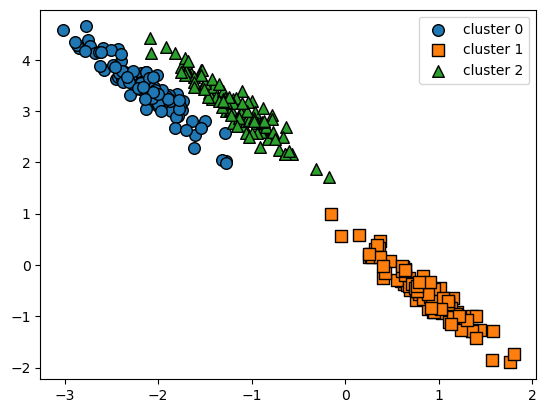

In [37]:
visualize_clustering(gmm, dataset_df, "gmm_cluster_id", False)